In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [2]:
!mkdir -p /root/.kaggle

In [3]:
import shutil

shutil.move("kaggle.json", "/root/.kaggle/")

'/root/.kaggle/kaggle.json'

In [4]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d muratkokludataset/grapevine-leaves-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/grapevine-leaves-image-dataset
License(s): CC0-1.0


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/grapevine-leaves-image-dataset.zip')
zip_ref.extractall()
zip_ref.close()

In [7]:
!ls Grapevine_Leaves_Image_Dataset

Ak  Ala_Idris  Buzgulu	Dimnit	Grapevine_Leaves_Image_Dataset_Citation_Request.txt  Nazli


In [8]:
import os

for dirpath, dirnames, filenames in os.walk('Grapevine_Leaves_Image_Dataset'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 5 directories and 1 images in Grapevine_Leaves_Image_Dataset.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Ak.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Buzgulu.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Nazli.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Ala_Idris.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Dimnit.


In [9]:
for i in os.walk('Grapevine_Leaves_Image_Dataset'):
  print(i)

('Grapevine_Leaves_Image_Dataset', ['Ak', 'Buzgulu', 'Nazli', 'Ala_Idris', 'Dimnit'], ['Grapevine_Leaves_Image_Dataset_Citation_Request.txt'])
('Grapevine_Leaves_Image_Dataset/Ak', [], ['Ak (35).png', 'Ak (26).png', 'Ak (93).png', 'Ak (50).png', 'Ak (51).png', 'Ak (87).png', 'Ak (90).png', 'Ak (23).png', 'Ak (45).png', 'Ak (57).png', 'Ak (81).png', 'Ak (73).png', 'Ak (8).png', 'Ak (31).png', 'Ak (30).png', 'Ak (2).png', 'Ak (92).png', 'Ak (42).png', 'Ak (72).png', 'Ak (89).png', 'Ak (96).png', 'Ak (60).png', 'Ak (65).png', 'Ak (85).png', 'Ak (21).png', 'Ak (39).png', 'Ak (24).png', 'Ak (15).png', 'Ak (75).png', 'Ak (86).png', 'Ak (9).png', 'Ak (76).png', 'Ak (98).png', 'Ak (66).png', 'Ak (62).png', 'Ak (3).png', 'Ak (95).png', 'Ak (55).png', 'Ak (36).png', 'Ak (100).png', 'Ak (16).png', 'Ak (77).png', 'Ak (11).png', 'Ak (33).png', 'Ak (5).png', 'Ak (22).png', 'Ak (58).png', 'Ak (34).png', 'Ak (64).png', 'Ak (99).png', 'Ak (12).png', 'Ak (48).png', 'Ak (6).png', 'Ak (70).png', 'Ak (41).

In [10]:
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class
  random_img = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (511, 511, 4)


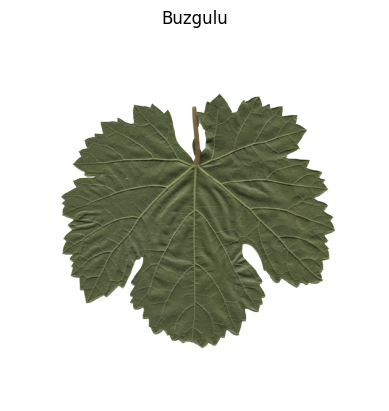

In [11]:
img = view_random_image(target_dir='/content/Grapevine_Leaves_Image_Dataset/',target_class='Buzgulu')

In [12]:
img/255

array([[[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.003921

# Fit the model

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
valid_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

dir = '/content/Grapevine_Leaves_Image_Dataset'

In [14]:
train_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='training',
                                               seed=42)

valid_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='validation',
                                               seed=42)

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [15]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [17]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.1620 - loss: 3.6928 - val_accuracy: 0.2100 - val_loss: 1.8351
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.2794 - loss: 1.6889 - val_accuracy: 0.2600 - val_loss: 1.6023
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.4235 - loss: 1.4968 - val_accuracy: 0.3000 - val_loss: 1.5818
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.4780 - loss: 1.3872 - val_accuracy: 0.2900 - val_loss: 1.6284
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5900 - loss: 1.1605 - val_accuracy: 0.2500 - val_loss: 1.7197


In [18]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         140,455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 430,397 (1.64 MB)

 Trainable params: 143,465 (560.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 286,932 (1.09 MB)

Image shape: (511, 511, 4)
Image shape: (511, 511, 4)
Image shape: (511, 511, 4)
Image shape: (511, 511, 4)
Image shape: (511, 511, 4)


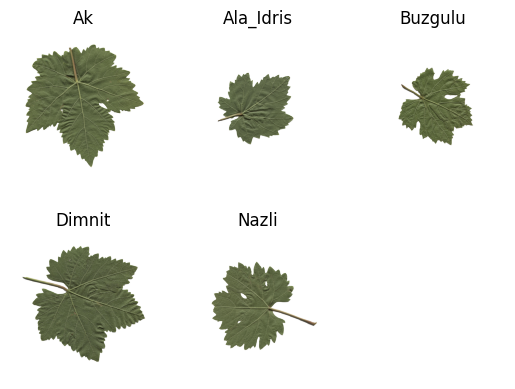

In [19]:
plt.figure()
plt.subplot(2,3,1)
view_random_image('Grapevine_Leaves_Image_Dataset/','Ak');
plt.subplot(2,3,2)
view_random_image('Grapevine_Leaves_Image_Dataset/','Ala_Idris');
plt.subplot(2,3,3)
view_random_image('Grapevine_Leaves_Image_Dataset/','Buzgulu');
plt.subplot(2,3,4)
view_random_image('Grapevine_Leaves_Image_Dataset/','Dimnit');
plt.subplot(2,3,5)
view_random_image('Grapevine_Leaves_Image_Dataset/','Nazli');

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

dir = '/content/Grapevine_Leaves_Image_Dataset'

train_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='training',
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='validation',
                                               seed=42)

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [21]:
images, labels = next(train_data)

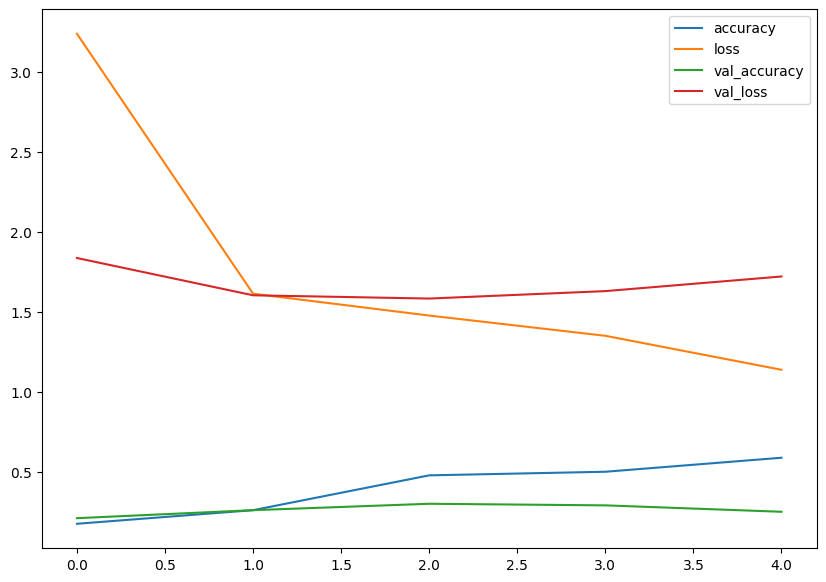

In [22]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [23]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

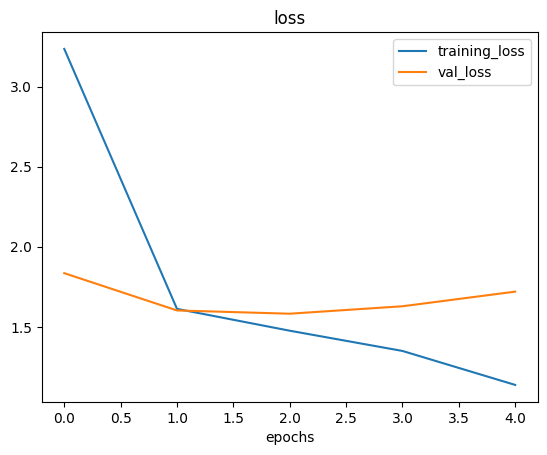

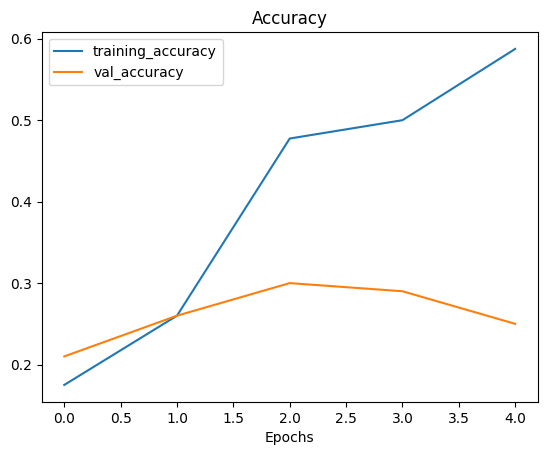

In [24]:
plot_loss_curves(history_1)

# Data Augmentation

In [25]:
# Augmented Dataset
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,
                                             vertical_flip=True)

# Normal Dataset
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
print('Train data augmented: ')
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=dir,
                                                                   batch_size=32,
                                                                   target_size=(224,224),
                                                                   class_mode='categorical',
                                                                   shuffle=False,
                                                                   seed=42)

print('Non-Augmented data: ')
train_data = train_datagen.flow_from_directory(directory=dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               subset='training',
                                               shuffle=False,
                                               seed=42)

IMG_SIZE = (224,224)
test_data = test_datagen.flow_from_directory(directory=dir,
                                             batch_size=32,
                                             target_size=IMG_SIZE,
                                             class_mode='categorical',
                                             seed=42)

Train data augmented: 
Found 500 images belonging to 5 classes.
Non-Augmented data: 
Found 400 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [27]:
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

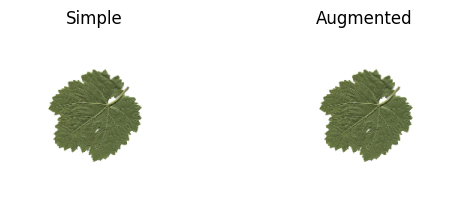

In [28]:
plt.figure()
random_number = np.random.randint(len(augmented_images))

plt.subplot(2,2,1)
plt.imshow(images[random_number])
plt.title('Simple')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(images[random_number])
plt.title('Augmented')
plt.axis('off')

In [29]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2.compile(loss='categorical_crossentropy',
               optimizer=optimizer,
               metrics=['accuracy'])

In [31]:
history_2 = model_2.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.1361 - loss: 16.0191 - val_accuracy: 0.2100 - val_loss: 1.6588
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.2893 - loss: 1.5997 - val_accuracy: 0.2120 - val_loss: 1.6284
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.1540 - loss: 1.6580 - val_accuracy: 0.2500 - val_loss: 1.6015
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.2837 - loss: 1.5991 - val_accuracy: 0.2280 - val_loss: 1.6002
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 72s 5s/step - accuracy: 0.2470 - loss: 1.6041 - val_accuracy: 0.2380 - val_loss: 1.5984


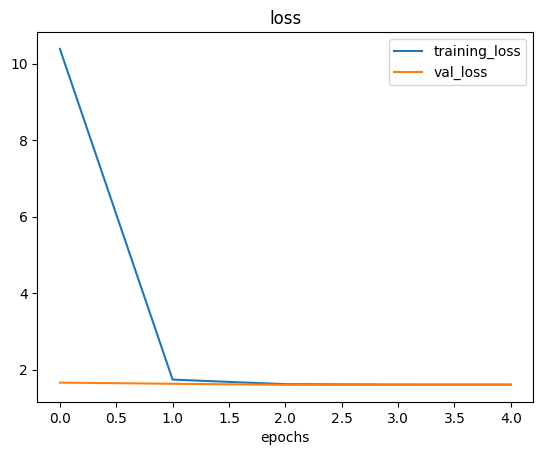

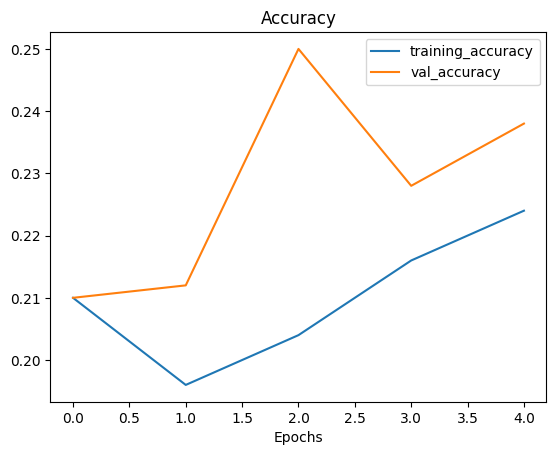

In [32]:
plot_loss_curves(history_2)

In [33]:
# Shuffle data
train_data_augmented_and_shuffled = train_datagen_augmented.flow_from_directory(directory=dir,
                                                                                batch_size=32,
                                                                                target_size=IMG_SIZE,
                                                                                class_mode='categorical',
                                                                                subset='training',
                                                                                shuffle=True)

Found 500 images belonging to 5 classes.


In [34]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [35]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_3.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

# CheckPoint and EarlyStopping

In [36]:
ckp = tf.keras.callbacks.ModelCheckpoint('MyCheckpoint.weights.h5',
                                                   save_weights_only=True)
es = tf.keras.callbacks.EarlyStopping(restore_best_weights=True,
                                                     patience=1,
                                                     monitor='loss')

In [37]:
history_3 = model_3.fit(train_data_augmented_and_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_and_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[ckp,es])

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 0.1932 - loss: 2.7245 - val_accuracy: 0.2160 - val_loss: 1.6151
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.1634 - loss: 1.6174 - val_accuracy: 0.2300 - val_loss: 1.5987
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.2622 - loss: 1.5988 - val_accuracy: 0.2300 - val_loss: 1.5918
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.1987 - loss: 1.5998 - val_accuracy: 0.2500 - val_loss: 1.5821


In [38]:
augmented_images.shape

(32, 224, 224, 3)

In [39]:
tf.expand_dims(augmented_labels,axis=0)

<tf.Tensor: shape=(1, 32, 5), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0

# BatchNormalization

In [40]:
model_1_with_bn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           input_shape=(224, 224, 3),
                           strides=(2, 2),
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal',
                           strides=(2, 2)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal',
                           strides=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal',
                           strides=(2, 2)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [41]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1_with_bn.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])

In [42]:
history_1_with_bn = model_1_with_bn.fit(train_data_augmented,
                                        epochs=5,
                                        steps_per_epoch=len(train_data_augmented),
                                        validation_data=test_data,
                                        validation_steps=len(test_data))

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.2385 - loss: 3.7009 - val_accuracy: 0.1980 - val_loss: 1.6419
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2327 - loss: 3.0434 - val_accuracy: 0.2120 - val_loss: 1.6487
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.1918 - loss: 3.0093 - val_accuracy: 0.2320 - val_loss: 1.6423
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2055 - loss: 2.6813 - val_accuracy: 0.2320 - val_loss: 1.6097
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1766 - loss: 2.5194 - val_accuracy: 0.2640 - val_loss: 1.6035


In [43]:
model_1_with_bn.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step - accuracy: 0.2648 - loss: 1.6025


[1.603475570678711, 0.2639999985694885]

# Transfer Learning

In [44]:
resnet_url = 'https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2'
efficientrel_url = 'https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/b0-feature-vector/1'

In [45]:
import tensorflow_hub as hub

IMAGE_SHAPE = (224,224)
def create_model(model_url, num_classes=5):
  feature_extraction_layer = hub.KerasLayer(model_url,
                                            trainable=False,
                                            name='Feature_extraction_layer',
                                            input_shape = IMAGE_SHAPE + (3, ))
  model = tf.keras.Sequential([
      tf.keras.layers.Lambda(lambda x: feature_extraction_layer(x)),
      tf.keras.layers.Dense(num_classes, activation='softmax', name='output_layer')
  ])
  return model

In [46]:
resnet_model = create_model(resnet_url,num_classes=train_data.num_classes)

In [47]:
resnet_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
resnet_model.weights

[]

In [49]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])

In [50]:
resnet_history = resnet_model.fit(train_data,
                                  batch_size=32,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=train_data,
                                  validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 182s 14s/step - accuracy: 0.0723 - loss: 2.6996 - val_accuracy: 0.1825 - val_loss: 1.9174
Epoch 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


13/13 ━━━━━━━━━━━━━━━━━━━━ 181s 12s/step - accuracy: 0.2731 - loss: 1.7242 - val_accuracy: 0.2200 - val_loss: 1.9401
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 202s 12s/step - accuracy: 0.2297 - loss: 1.9151 - val_accuracy: 0.3075 - val_loss: 1.6031
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 266s 18s/step - accuracy: 0.2435 - loss: 1.6065 - val_accuracy: 0.3525 - val_loss: 1.4546
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 152s 12s/step - accuracy: 0.2477 - loss: 1.5876 - val_accuracy: 0.4850 - val_loss: 1.2820


In [50]:
resnet_model.evaluate(test_data)

In [51]:
resnet_model.layers

[<Lambda name=lambda, built=True>, <Dense name=output_layer, built=True>]

In [52]:
resnet_model.layers[0]

<Lambda name=lambda, built=True>

In [53]:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('Epochs')
  plt.legend()

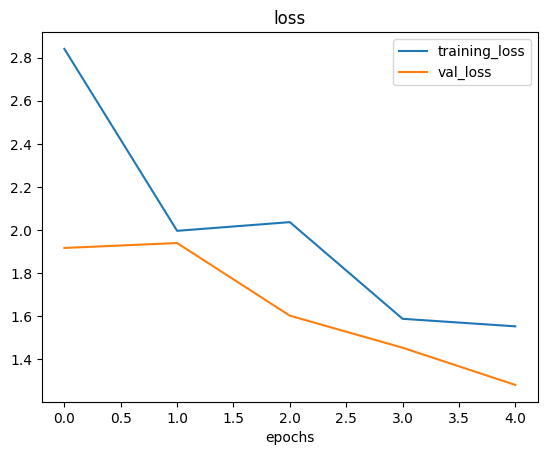

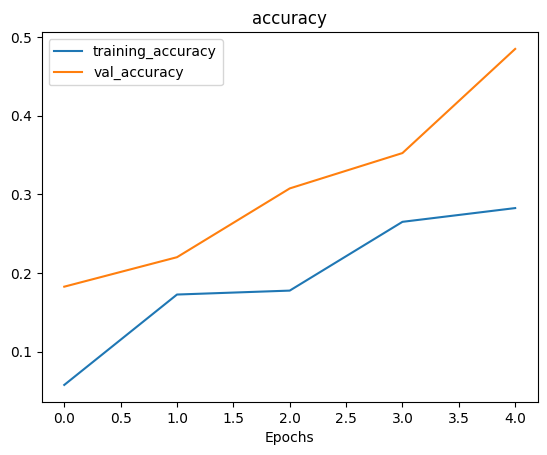

In [54]:
plot_loss_curve(resnet_history)

In [57]:
efficientrel_url = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1"

efficientrel_model = create_model(efficientrel_url, train_data.num_classes)

In [58]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
efficientrel_model.compile(loss='categorical_crossentropy',
                           optimizer=optimizer,
                           metrics=['accuracy'])

In [60]:
efficientrel_history = efficientrel_model.fit(train_data,
                                              epochs=5,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.1626 - loss: 1.8863 - val_accuracy: 0.2380 - val_loss: 1.7146
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 80s 6s/step - accuracy: 0.2128 - loss: 1.5943 - val_accuracy: 0.4220 - val_loss: 1.4561
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 113s 9s/step - accuracy: 0.3847 - loss: 1.4564 - val_accuracy: 0.4940 - val_loss: 1.3537
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 103s 6s/step - accuracy: 0.5492 - loss: 1.2747 - val_accuracy: 0.5800 - val_loss: 1.2522
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step - accuracy: 0.5776 - loss: 1.2335 - val_accuracy: 0.5380 - val_loss: 1.2136


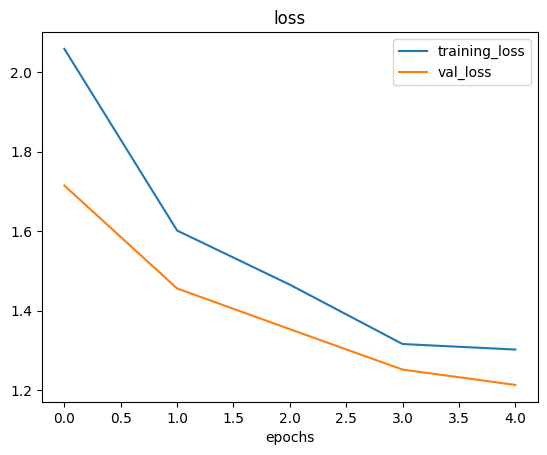

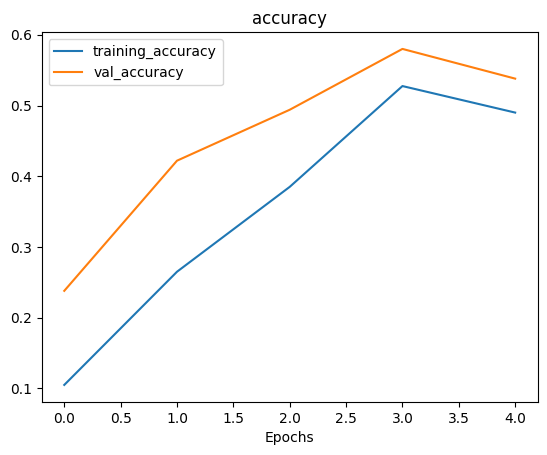

In [61]:
plot_loss_curve(efficientrel_history)

In [62]:
efficientrel_model.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.5214 - loss: 1.2237


[1.2136316299438477, 0.5379999876022339]